In [1]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np
import neuralNet as nn
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
all_data = loadmat("../ex3data1.mat")
X_all = all_data['X']
y_all = all_data['y']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size = .9)
y_classes = np.unique(y_train)
classDict = dict(zip(range(len(y_classes)),y_classes))

/Users/johnsnyder/.virtualenvs/neuralNetTut/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
print(X_train.shape,X_test.shape)
print(classDict)
print(y_classes)

(4500, 400) (500, 400)
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10}
[ 1  2  3  4  5  6  7  8  9 10]


In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train).transpose()
y_train_onehot = label_binarize(y_train,y_classes).transpose()

X_test_scaled = scaler.transform(X_test).transpose()
y_test_onehot = label_binarize(y_test,y_classes).transpose()

In [6]:
print(scaler.mean_[25])
print(np.mean(X_train,axis=0)[25])

0.0002072550343439827
0.0002072550343439827


In [7]:
neuralNetMutExc = nn.fullyConnectClassHyper(X_train_scaled,y_train_onehot,classDict,[25,25,25], alpha =.05, p_keep = 1.0, regular = {"lambd":0.0, "N":2})

In [8]:
neuralNetMutExc.fit(100,X_test_scaled,y_test_onehot)

array([2.04377484, 1.15398625, 0.58068177, 0.37187559, 0.28898911,
       0.2394572 , 0.2040415 , 0.17801254, 0.15969285, 0.1425094 ,
       0.1273055 , 0.11541989, 0.10525189, 0.09658588, 0.09005937,
       0.08067735, 0.07398214, 0.06905737, 0.06353525, 0.0577476 ,
       0.0537619 , 0.05084251, 0.04606964, 0.04281503, 0.04016127,
       0.03720118, 0.03438923, 0.03301326, 0.02974787, 0.0285358 ,
       0.02688584, 0.02567626, 0.0232428 , 0.02226842, 0.02019221,
       0.01869479, 0.01740163, 0.01672545, 0.01551314, 0.01471153,
       0.01388656, 0.01324298, 0.01257375, 0.01190507, 0.01155016,
       0.01095759, 0.01061881, 0.01001082, 0.00956918, 0.00911561,
       0.00867649, 0.00832165, 0.00804544, 0.00774521, 0.00751295,
       0.00724825, 0.00705696, 0.00686774, 0.00664747, 0.0065017 ,
       0.00632312, 0.00617762, 0.00603754, 0.00588974, 0.00580344,
       0.00564154, 0.00556479, 0.0054129 , 0.00532476, 0.00524024,
       0.00512975, 0.00503338, 0.00494059, 0.00485264, 0.00476

1.6130657954781755


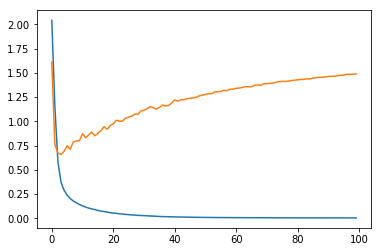

In [9]:
print(neuralNetMutExc.test_loss_vec[0])
plt.plot(neuralNetMutExc.train_loss_vec)
plt.plot(neuralNetMutExc.test_loss_vec)
plt.show()

In [10]:
#update hyperparameters
hyperDict = {"alpha":.01,"regular":{"lambd":0.03, "N":2}}
neuralNetMutExc.updateHyperparam(**hyperDict)

In [11]:
neuralNetMutExc.updateHyperparam(fakeParam = 2,fakeParam2 = 5)

The following are not valid hyperparameter names
 ['fakeParam2', 'fakeParam']
These are the hyperparameters and their values:
p_keep :  1.0
alpha :  0.01
gradNorm :  inf
gradClip :  inf
regular :  {'lambd': 0.03, 'N': 2}


In [13]:
neuralNetMutExc.fit(200,X_test_scaled,y_test_onehot)

array([0.24758668, 0.23528621, 0.2358118 , 0.235346  , 0.235715  ,
       0.23527842, 0.23569817, 0.23512792, 0.23549665, 0.23522824,
       0.23511693, 0.23529925, 0.23513106, 0.23502355, 0.23522449,
       0.23493708, 0.2350757 , 0.23522244, 0.2348513 , 0.23475198,
       0.23452941, 0.23492051, 0.23477636, 0.23435094, 0.23432959,
       0.23452262, 0.2344853 , 0.23374979, 0.23398059, 0.23410532,
       0.23401257, 0.2342279 , 0.23392063, 0.23355599, 0.23420679,
       0.23351296, 0.23377391, 0.23373812, 0.2332544 , 0.23354802,
       0.23346953, 0.23306734, 0.2331677 , 0.23312673, 0.23323771,
       0.23286545, 0.23281235, 0.2329127 , 0.23281231, 0.23273085,
       0.23273837, 0.23240509, 0.23253641, 0.23267768, 0.23211259,
       0.23245029, 0.23208415, 0.23205732, 0.23194609, 0.2315511 ,
       0.23247455, 0.23230658, 0.23202894, 0.23188014, 0.23164624,
       0.23156079, 0.23131594, 0.23158611, 0.23105924, 0.23110645,
       0.23096988, 0.23134954, 0.23122391, 0.23091268, 0.23098

2.0437748423255324


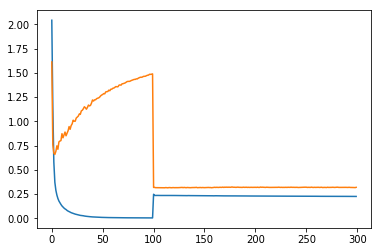

In [14]:
print(neuralNetMutExc.train_loss_vec[0])
plt.plot(neuralNetMutExc.train_loss_vec)
plt.plot(neuralNetMutExc.test_loss_vec)
plt.show()

In [15]:
YHat, loss = neuralNetMutExc.predict(X_test_scaled,y_test_onehot)
print(YHat.shape)
max_ind = np.argmax(YHat,axis = 0)
max_prob = np.amax(YHat,axis = 0)
max_prob_class = [neuralNetMutExc.outputL.classVec[x] for x in max_ind]

print(len(max_prob_class))
print(len(y_test))

(10, 500)
500
500


In [16]:
print(YHat[:,:15])
print(max_prob_class)
print(y_test.transpose())
unique, counts = np.unique(y_test, return_counts = True)
dict(zip(unique,counts))

[[1.87469839e-03 7.66835701e-05 9.20881461e-04 1.00293955e-03
  1.98798531e-03 9.43043195e-01 1.93916377e-03 7.56342441e-04
  7.41386572e-01 2.78939231e-04 9.33488028e-01 7.94447757e-03
  1.82184278e-04 6.84857958e-04 2.78959809e-04]
 [1.45038336e-03 1.43138365e-03 4.26871112e-04 1.00293955e-03
  1.15597487e-02 7.47715462e-03 9.90522438e-01 7.56342441e-04
  8.89922822e-02 1.19710063e-03 1.03209740e-02 9.54624486e-01
  1.81272229e-03 4.60218281e-03 2.57967986e-03]
 [1.02341103e-02 7.66835701e-05 4.26871112e-04 4.26442693e-03
  3.83880894e-03 4.96011311e-03 3.71781345e-03 7.56342441e-04
  6.59064178e-02 9.89096197e-01 9.12523357e-03 1.67075919e-03
  5.44965844e-05 3.18264689e-04 2.78959809e-04]
 [7.49012338e-03 7.66835701e-05 9.84391656e-01 1.50410903e-02
  1.98798531e-03 7.07671996e-03 1.10694438e-04 9.10675363e-01
  5.80190699e-03 1.06409952e-04 8.86264275e-03 7.97933497e-04
  1.08543593e-03 6.40877089e-03 2.78959809e-04]
 [9.50464256e-01 1.07592127e-03 3.83753754e-03 9.56611030e-01
  

{1: 55, 2: 41, 3: 50, 4: 50, 5: 58, 6: 47, 7: 40, 8: 51, 9: 50, 10: 58}

In [17]:
print("accuracy:",np.mean(max_prob_class==y_test.transpose()))

accuracy: 0.93
